<a href="https://colab.research.google.com/github/laxmispandana/Explainable-AI/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Model Equation: y = 10.0000 + 5.0000 * x
Intercept: 10.0000
Slope: 5.0000
Predicted cars sold for 10 TV ads: 60.00

Results with SHAP values:
   Number of TV Ads  Number of Cars Sold  Prediction  Expected_Value  \
0                 1                   14        15.0            20.0   
1                 3                   24        25.0            20.0   
2                 2                   18        20.0            20.0   
3                 1                   17        15.0            20.0   
4                 3                   27        25.0            20.0   

   SHAP_Value  Expected_plus_SHAP  
0        -5.0                15.0  
1         5.0                25.0  
2         0.0                20.0  
3        -5.0                15.0  
4         5.0                25.0  


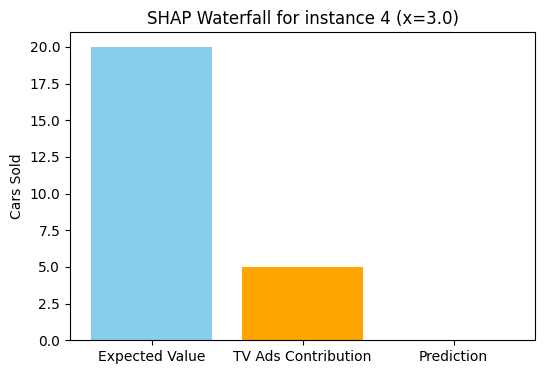

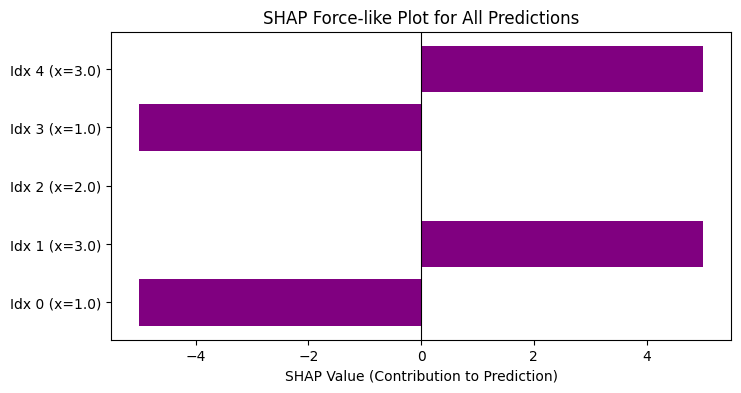

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1.Load Dataset
df = pd.read_excel("Car_Sales.xlsx")

# Rename columns if needed
if 'x' in df.columns and 'y' in df.columns:
    df = df.rename(columns={'x': 'Number of TV Ads', 'y': 'Number of Cars Sold'})
else:
    df = df.rename(columns={df.columns[0]: 'Number of TV Ads', df.columns[1]: 'Number of Cars Sold'})

# Extract variables
X = df[['Number of TV Ads']].astype(float).values
y = df['Number of Cars Sold'].astype(float).values


# 2. Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Model Equation: y = {intercept:.4f} + {slope:.4f} * x")
print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")

# 3. Prediction for 10 TV ads

x_pred = 10
y_pred_10 = model.predict([[x_pred]])[0]
print(f"Predicted cars sold for {x_pred} TV ads: {y_pred_10:.2f}")


# 4. SHAP Values (Analytical for Linear Model)
mean_x = np.mean(X)
expected_value = model.predict([[mean_x]])[0]
shap_values = (X.flatten() - mean_x) * slope
predictions = model.predict(X)

# Combine into a results DataFrame
results_df = df.copy()
results_df['Prediction'] = predictions
results_df['Expected_Value'] = expected_value
results_df['SHAP_Value'] = shap_values
results_df['Expected_plus_SHAP'] = results_df['Expected_Value'] + results_df['SHAP_Value']

print("\nResults with SHAP values:")
print(results_df)

# 5. SHAP-style Waterfall Plot (example: last instance)

idx = len(df) - 1
shap_i = shap_values[idx]
pred_i = predictions[idx]

plt.figure(figsize=(6,4))
bars = ['Expected Value', 'TV Ads Contribution', 'Prediction']
vals = [expected_value, shap_i, pred_i - (expected_value + shap_i)]
plt.bar(bars, [expected_value, shap_i, pred_i - (expected_value + shap_i)], color=['skyblue', 'orange', 'green'])
plt.title(f"SHAP Waterfall for instance {idx} (x={X[idx][0]})")
plt.ylabel("Cars Sold")
plt.show()


# 6. Force-like SHAP Plot (All instances)

plt.figure(figsize=(8,4))
y_pos = np.arange(len(df))
plt.barh(y_pos, shap_values, color='purple')
plt.yticks(y_pos, [f"Idx {i} (x={X[i][0]})" for i in range(len(df))])
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("SHAP Value (Contribution to Prediction)")
plt.title("SHAP Force-like Plot for All Predictions")
plt.show()


📌 Linear Regression Equation:
Test_Score = 29.75 + (0.35 * IQ) + (0.88 * Study_Hours)

📈 Coefficient Interpretation:
IQ Coefficient: 0.35 → Each unit increase in IQ increases predicted test score by this value.
Study Hours Coefficient: 0.88 → Each additional study hour increases predicted test score by this value.
Intercept: 29.75 → Predicted test score when IQ and Study Hours are both 0.

🎯 Predicted test score for student with IQ=95 and Study Hours=25: 85.27


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



📊 SHAP Waterfall Plot for Student 3:


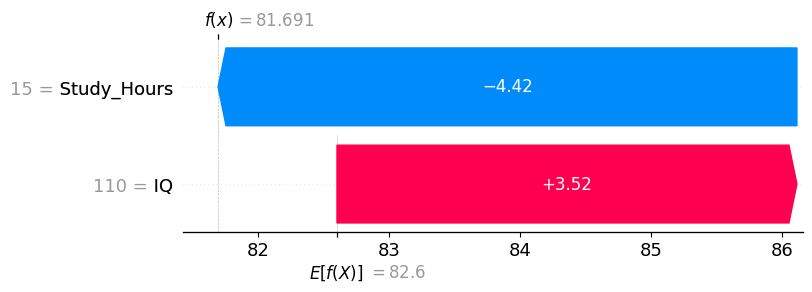


🌀 SHAP Force Plot for all students:

📋 SHAP Contribution Analysis:
Student 1: IQ Contribution = -3.52, Study Hours Contribution = -8.85
Student 2: IQ Contribution = 0.00, Study Hours Contribution = 0.00
Student 3: IQ Contribution = 3.52, Study Hours Contribution = -4.42
Student 4: IQ Contribution = 1.76, Study Hours Contribution = 4.42
Student 5: IQ Contribution = -1.76, Study Hours Contribution = 8.85

🕵 Student(s) where Study Hours contribute more than IQ:
→ Student 1 (IQ=90, Study Hours=10)
→ Student 3 (IQ=110, Study Hours=15)
→ Student 4 (IQ=105, Study Hours=25)
→ Student 5 (IQ=95, Study Hours=30)


In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# 1. Load Dataset
# -----------------------------
# Replace this with your actual dataset if provided
data = {
    'IQ': [90, 100, 110, 105, 95],
    'Study_Hours': [10, 20, 15, 25, 30],
    'Test_Score': [70, 85, 80, 90, 88]
}
df = pd.DataFrame(data)

# Features and target
X = df[['IQ', 'Study_Hours']]
y = df['Test_Score']

# -----------------------------
# 2. Fit Multiple Linear Regression
# -----------------------------
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

print("\n📌 Linear Regression Equation:")
print(f"Test_Score = {intercept:.2f} + ({coefficients[0]:.2f} * IQ) + ({coefficients[1]:.2f} * Study_Hours)")

# -----------------------------
# 3. Interpret Coefficients
# -----------------------------
print("\n📈 Coefficient Interpretation:")
print(f"IQ Coefficient: {coefficients[0]:.2f} → Each unit increase in IQ increases predicted test score by this value.")
print(f"Study Hours Coefficient: {coefficients[1]:.2f} → Each additional study hour increases predicted test score by this value.")
print(f"Intercept: {intercept:.2f} → Predicted test score when IQ and Study Hours are both 0.")

# -----------------------------
# 4. Make a Prediction
# -----------------------------
student_iq = 95
student_study_hours = 25
predicted_score = model.predict([[student_iq, student_study_hours]])[0]

print(f"\n🎯 Predicted test score for student with IQ={student_iq} and Study Hours={student_study_hours}: {predicted_score:.2f}")

# -----------------------------
# 5. Apply SHAP
# -----------------------------
shap.initjs()
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Waterfall Plot for one instance (e.g., student 3 - index 2)
print("\n📊 SHAP Waterfall Plot for Student 3:")
shap.plots.waterfall(shap_values[2])

# Force Plot for all predictions
print("\n🌀 SHAP Force Plot for all students:")
shap.plots.force(shap_values)

# -----------------------------
# 6. SHAP Analysis
# -----------------------------
print("\n📋 SHAP Contribution Analysis:")
for i in range(len(X)):
    iq_contrib = shap_values[i].values[0]
    hour_contrib = shap_values[i].values[1]
    print(f"Student {i+1}: IQ Contribution = {iq_contrib:.2f}, Study Hours Contribution = {hour_contrib:.2f}")

# Identify where Study Hours contributed more than IQ
print("\n🕵 Student(s) where Study Hours contribute more than IQ:")
for i in range(len(X)):
    iq_contrib = shap_values[i].values[0]
    hour_contrib = shap_values[i].values[1]
    if abs(hour_contrib) > abs(iq_contrib):
        print(f"→ Student {i+1} (IQ={X.iloc[i,0]}, Study Hours={X.iloc[i,1]})")


Model equation: Sales = 164.27 + (5.28 * Intelligence) + (10.15 * Extroversion)

Predicted sales for Intelligence=100, Extroversion=25: $945.53
Predicted sales for Intelligence=120, Extroversion=18: $980.03


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


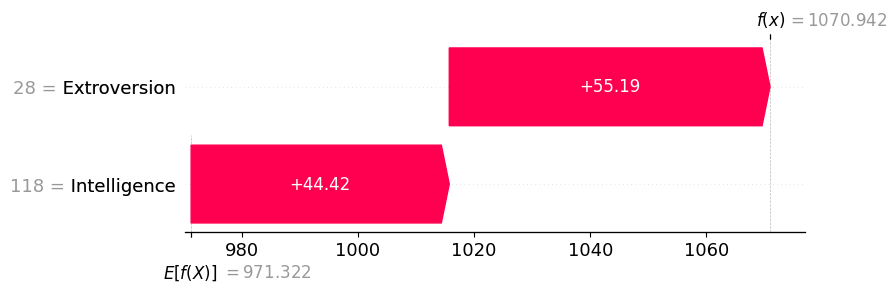

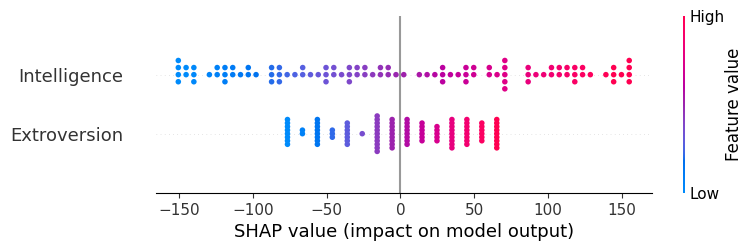


Average absolute SHAP values:
Intelligence    83.168445
Extroversion    36.818294
dtype: float64


In [ ]:
# STEP 1: INSTALL REQUIRED LIBRARIES (ONLY NEEDS TO BE RUN ONCE)
!pip install shap --quiet

# STEP 2: IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

# Optional: Better plot rendering
shap.initjs()

# STEP 3: SIMULATE DATA (REPLACE THIS WITH YOUR CSV LOAD LATER)
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'Intelligence': np.random.randint(80, 140, n),
    'Extroversion': np.random.randint(15, 30, n)
})
# Simulate sales: Sales = 200 + 5 * Intelligence + 10 * Extroversion + noise
df['Sales'] = 200 + 5 * df['Intelligence'] + 10 * df['Extroversion'] + np.random.normal(0, 50, n)

# STEP 4: FIT MULTIPLE LINEAR REGRESSION
X = df[['Intelligence', 'Extroversion']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

# Print model equation
intercept = model.intercept_
coef_intelligence, coef_extroversion = model.coef_
print(f"Model equation: Sales = {intercept:.2f} + ({coef_intelligence:.2f} * Intelligence) + ({coef_extroversion:.2f} * Extroversion)")

# STEP 5: MAKE PREDICTIONS
pred1 = model.predict([[100, 25]])[0]
pred2 = model.predict([[120, 18]])[0]
print(f"\nPredicted sales for Intelligence=100, Extroversion=25: ${pred1:.2f}")
print(f"Predicted sales for Intelligence=120, Extroversion=18: ${pred2:.2f}")

# STEP 6: APPLY SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Waterfall plot for the first instance
shap.plots.waterfall(shap_values[0])

# Force plot for the same prediction
shap.plots.force(shap_values[0])

# STEP 7: SHAP SUMMARY PLOT
shap.plots.beeswarm(shap_values)

# STEP 8: AVERAGE CONTRIBUTION ANALYSIS
contrib = pd.DataFrame(shap_values.values, columns=X.columns)
print("\nAverage absolute SHAP values:")
print(contrib.abs().mean())


--- Linear Regression Model ---
Equation: y = 20.5759 + 0.0095*Facebook + 0.5164*Newspaper
Intercept: 20.5759
Facebook Coefficient: 0.0095
Newspaper Coefficient: 0.5164

--- Predictions ---
Weekly sales for Facebook=50, Newspaper=70: 57.20 thousand units
Weekly sales for Facebook=25, Newspaper=30: 36.31 thousand units

--- SHAP Results ---
     Facebook  Newspaper  Sales  sales  Prediction  Expected_Value  \
0      276.12      45.36  83.04  26.52   46.617328         36.6648   
1       53.40      47.16  54.12  12.48   45.436603         36.6648   
2       20.64      55.08  83.16  11.16   49.216307         36.6648   
3      181.80      49.56  70.20  22.20   47.892634         36.6648   
4      216.96      12.96  70.08  15.48   29.324519         36.6648   
..        ...        ...    ...    ...         ...             ...   
195     45.84       4.44  16.56   9.12   23.303174         36.6648   
196    113.04       5.88   9.72  11.64   24.683557         36.6648   
197    212.40      11.16   

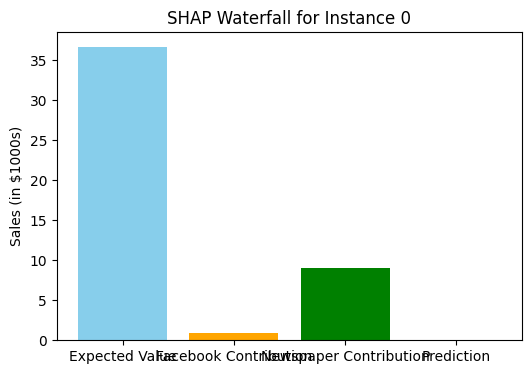

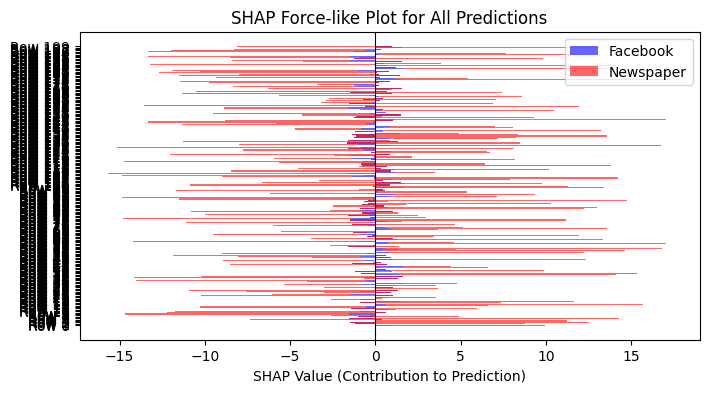

In [ ]:
#Question-5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 1. Load Dataset
df = pd.read_excel("Marketing_Dataset.xlsx")
# Rename columns if needed
if "Facebook" not in df.columns or "Newspaper" not in df.columns or "Sales" not in df.columns:
    df = df.rename(columns={
        df.columns[0]: "Facebook",
        df.columns[1]: "Newspaper",
        df.columns[2]: "Sales"
    })

# Features and target
X = df[["Facebook", "Newspaper"]].astype(float).values
y = df["Sales"].astype(float).values
# 2. Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coef_facebook = model.coef_[0]
coef_newspaper = model.coef_[1]
print("\n--- Linear Regression Model ---")
print(f"Equation: y = {intercept:.4f} + {coef_facebook:.4f}*Facebook + {coef_newspaper:.4f}*Newspaper")
print(f"Intercept: {intercept:.4f}")
print(f"Facebook Coefficient: {coef_facebook:.4f}")
print(f"Newspaper Coefficient: {coef_newspaper:.4f}")
# 3. Predictions for given scenarios
# ============================
pred1 = model.predict([[50, 70]])[0]
pred2 = model.predict([[25, 30]])[0]
print("\n--- Predictions ---")
print(f"Weekly sales for Facebook=50, Newspaper=70: {pred1:.2f} thousand units")
print(f"Weekly sales for Facebook=25, Newspaper=30: {pred2:.2f} thousand units")
# 4. Compute SHAP Values (Analytical for Linear Regression)
mean_X = np.mean(X, axis=0)
expected_value = model.predict([mean_X])[0]
# SHAP for each feature = coefficient * (value - mean)
shap_values = (X - mean_X) * model.coef_
# Combine results
results_df = df.copy()
results_df["Prediction"] = model.predict(X)
results_df["Expected_Value"] = expected_value
results_df["SHAP_Facebook"] = shap_values[:, 0]
results_df["SHAP_Newspaper"] = shap_values[:, 1]
results_df["Total_SHAP"] = results_df["SHAP_Facebook"] + results_df["SHAP_Newspaper"]
results_df["Expected_plus_SHAP"] = results_df["Expected_Value"] + results_df["Total_SHAP"]
print("\n--- SHAP Results ---")
print(results_df)
# 5. SHAP-style Waterfall Plot (Example: First Row)
idx = 0  # Choose first row
shap_fb = results_df.loc[idx, "SHAP_Facebook"]
shap_news = results_df.loc[idx, "SHAP_Newspaper"]
pred_i = results_df.loc[idx, "Prediction"]
plt.figure(figsize=(6,4))
bars = ["Expected Value", "Facebook Contribution", "Newspaper Contribution", "Prediction"]
vals = [expected_value, shap_fb, shap_news, pred_i - (expected_value + shap_fb + shap_news)]
plt.bar(bars, [expected_value, shap_fb, shap_news, pred_i - (expected_value + shap_fb + shap_news)],
        color=["skyblue", "orange", "green", "purple"])
plt.title(f"SHAP Waterfall for Instance {idx}")
plt.ylabel("Sales (in $1000s)")
plt.show()
# 6. Force-like SHAP Plot (All Rows)
plt.figure(figsize=(8,4))
y_pos = np.arange(len(df))
plt.barh(y_pos, results_df["SHAP_Facebook"], color="blue", alpha=0.6, label="Facebook")
plt.barh(y_pos, results_df["SHAP_Newspaper"], left=results_df["SHAP_Facebook"],
         color="red", alpha=0.6, label="Newspaper")
plt.axvline(0, color='black', linewidth=0.8)
plt.yticks(y_pos, [f"Row {i}" for i in range(len(df))])
plt.xlabel("SHAP Value (Contribution to Prediction)")
plt.title("SHAP Force-like Plot for All Predictions")
plt.legend()
plt.show()

Equation: Salary = 25792.20 + 9449.96 * YearsExperience
Intercept: 25792.20 => Salary with 0 years experience
Slope: 9449.96 => Increase per year of experience
Predicted salary for 3.5 years: ₹58867.07
Predicted salary for 7.0 years: ₹91941.94


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


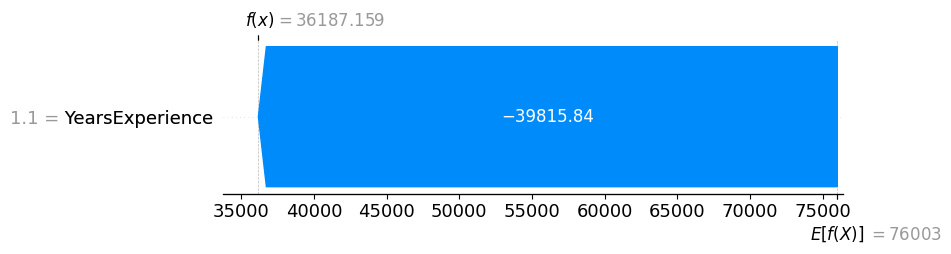

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap
shap.initjs()

# Fix deprecated NumPy types used in SHAP
np.bool = bool
np.int = int

# Load your dataset
df = pd.read_csv("Experience_Salary.csv")

# Split data into independent and dependent variables
X = df[['YearsExperience']]
y = df['Salary']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model equation
print(f"Equation: Salary = {model.intercept_:.2f} + {model.coef_[0]:.2f} * YearsExperience")

# Interpret coefficients
print(f"Intercept: {model.intercept_:.2f} => Salary with 0 years experience")
print(f"Slope: {model.coef_[0]:.2f} => Increase per year of experience")

# Predictions
exp_1 = 3.5
exp_2 = 7.0
pred1 = model.predict([[exp_1]])[0]
pred2 = model.predict([[exp_2]])[0]
print(f"Predicted salary for {exp_1} years: ₹{pred1:.2f}")
print(f"Predicted salary for {exp_2} years: ₹{pred2:.2f}")

# SHAP explanation
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

# SHAP waterfall plot for first instance
shap.plots.waterfall(shap_values[0])

# SHAP force plot (opens in notebook if you're using Jupyter)
shap.plots.force(shap_values[0])